In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def data(string):
    df = pd.read_csv(string)
    df["Date"] = pd.to_datetime(df["Date"])
    df.index = df["Date"]
    df.drop(['Date', 'Symbol', 'Series', 'Prev Close', 'High', 'Low', 'Last',
           'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
           '%Deliverble'],axis = 1,inplace = True)
    return df
df = data("TATASTEEL.csv")
df.head()

,Open
Date,
2000-01-03,148.00
2000-01-04,150.10
2000-01-05,144.60
2000-01-06,158.95
2000-01-07,173.40


In [19]:
def generate_features(df,prev_day):
    string = "Open_"
    temp = string
    for i in range(1,prev_day):
        string = string + str(i)
        df[string] = df["Open"].shift(i)
        string = temp
    df = df.dropna()
    return df

# Generating Features, open price for last 40 days

In [20]:
df = generate_features(df,40)
df.head()

,Open,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,Open_8,Open_9,...,Open_30,Open_31,Open_32,Open_33,Open_34,Open_35,Open_36,Open_37,Open_38,Open_39
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-28,129.2,129.1,131.3,135.5,134.35,134.00,135.95,136.00,135.80,133.50,...,161.00,167.90,165.00,179.00,173.95,173.40,158.95,144.60,150.10,148.00
2000-02-29,133.0,129.2,129.1,131.3,135.50,134.35,134.00,135.95,136.00,135.80,...,164.95,161.00,167.90,165.00,179.00,173.95,173.40,158.95,144.60,150.10
2000-03-01,123.0,133.0,129.2,129.1,131.30,135.50,134.35,134.00,135.95,136.00,...,166.90,164.95,161.00,167.90,165.00,179.00,173.95,173.40,158.95,144.60
2000-03-02,122.0,123.0,133.0,129.2,129.10,131.30,135.50,134.35,134.00,135.95,...,177.00,166.90,164.95,161.00,167.90,165.00,179.00,173.95,173.40,158.95
2000-03-03,112.5,122.0,123.0,133.0,129.20,129.10,131.30,135.50,134.35,134.00,...,171.00,177.00,166.90,164.95,161.00,167.90,165.00,179.00,173.95,173.40


In [21]:
from sklearn.preprocessing import StandardScaler
def process_data(df):
    n = int(len(df)*0.8)
    y = df["Open"]
    x = df.drop("Open",axis = 1)
    x_train = x[:n]
    y_train = y[:n]
    sc = StandardScaler()
    sc = sc.fit(x_train)
#     x_train = sc.transform(x_train)
#     x_test = sc.transform(x[n:])
    x_test = x[n:]
    y_train = pd.DataFrame(y[:n])
    y_test = pd.DataFrame(y[n:])
    return x_train,y_train,x_test,y_test,sc
x_train,y_train,x_test,y_test,sc = process_data(df)

<AxesSubplot:>

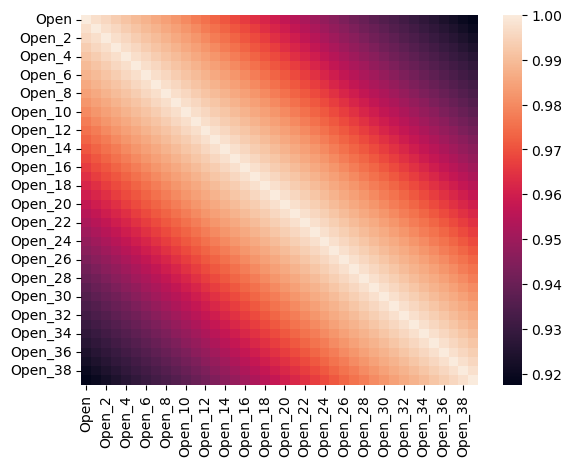

In [22]:
import seaborn as sns
sns.heatmap(df.corr(),linewidths=  0.001)

# Linear Regression


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(x_train,y_train)
pred = lr.predict(x_test)
# y_test = pd.DataFrame(y[n:])
y_test["Predicted"] = pred
y_test.head()

,Open,Predicted
Date,,
2015-12-30,256.40,257.918832
2015-12-31,260.00,254.393932
2016-01-01,259.00,259.567193
2016-01-04,255.00,260.620330
2016-01-05,257.55,256.349994


In [24]:
lr.coef_

array([[ 8.43029008e-01,  1.87510680e-01, -6.18482985e-02,
         9.61367668e-03,  2.11529636e-02,  1.52372598e-02,
         6.18222969e-03,  1.21530900e-02,  5.84364052e-03,
         6.68289359e-03, -8.74352277e-02,  5.18434688e-02,
        -2.88528661e-02,  2.16813597e-02,  3.31197766e-02,
        -9.17279139e-03, -2.46334358e-02, -8.79838421e-03,
         3.22145746e-02, -6.52528352e-02,  2.87514168e-02,
         1.54866122e-03,  1.15153092e-02, -6.44311906e-02,
         9.23961674e-02, -6.52663912e-02, -5.30544903e-03,
         2.54617607e-02,  1.22955962e-02, -3.50380618e-02,
         2.27190045e-02,  2.15069991e-02,  4.63444372e-04,
         1.59541400e-02,  9.04511690e-03, -1.41716486e-02,
         6.09974621e-03, -1.21095188e-02, -1.43555054e-02]])

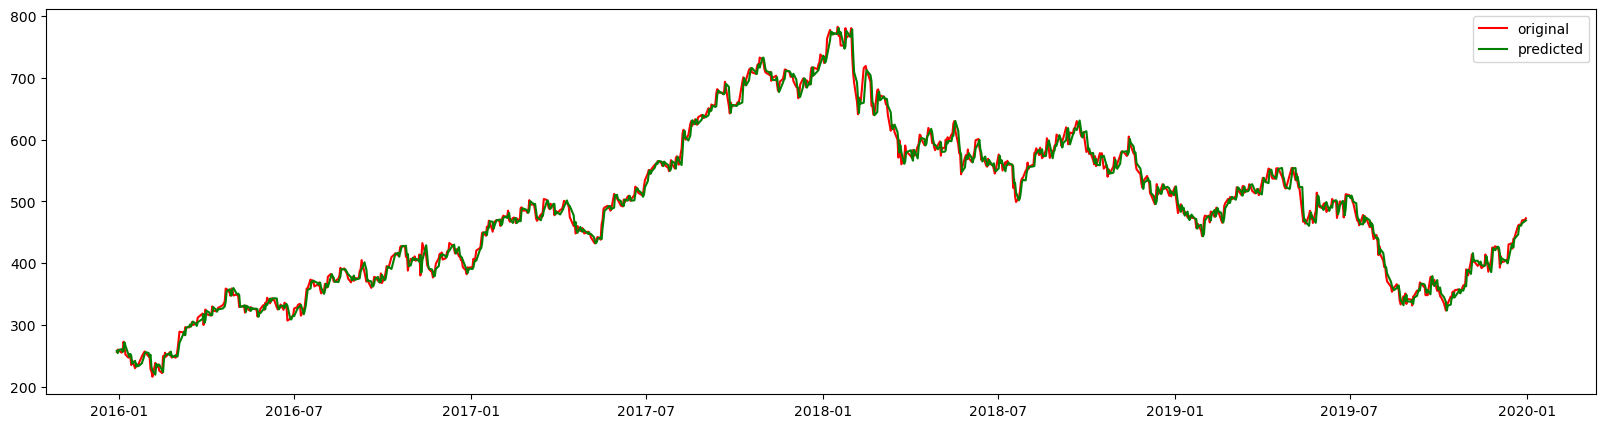

In [25]:
def graph(y_test,days = len(y_test)):
    plt.figure(figsize = (20,5))
    plt.plot(y_test["Open"][:days],c = 'r',label = "original")
    plt.plot(y_test["Predicted"][:days],c = 'g',label ="predicted")
    plt.legend()
    plt.show()
graph(y_test)

# Testing

We will buy on a day if the the predicted value of next day is grater than cuurent day, and will sell next day.
Once the stock is buyed it will be sold next day

In [26]:
def results(y_test):
    y_test["error"] = [y_test.at[i,"Open"] - y_test.at[i,"Predicted"] for i,row in y_test.iterrows()]
    PredictedReturns,ActualReturns = [],[]
    
    for i in range(1,len(y_test)):
        PredictedReturns.append(y_test.iat[i,1] - y_test.iat[i-1,0])
        ActualReturns.append(y_test.iat[i,0] - y_test.iat[i-1,0])
    actualMovement,predictedMovement = [],[]
    Open = y_test["Open"]
    Predicted = y_test["Predicted"]
    for i in range(1,len(Open)):
        if Open[i] - Open[i-1]  > 0 :
            actualMovement.append(1)
        else :
            actualMovement.append(0)

        if Predicted[i] - Open[i-1] > 0:
            predictedMovement.append(1)
        else :
            predictedMovement.append(0)
    y_test = y_test.iloc[1:,:]
    y_test["ActualReturns"] = ActualReturns
    y_test["PredictedReturns"] = PredictedReturns
    y_test["actualMovement"] = actualMovement
    y_test["predictedMovement"] = predictedMovement
    Type = []
    for i,row in y_test.iterrows():
        if(row["actualMovement"] == row["predictedMovement"] == 1):
            Type.append("tp")
        elif(row["actualMovement"] == row["predictedMovement"] == 0):
            Type.append("tn")
        elif(row["actualMovement"] == 0 and row["predictedMovement"] == 1):
            Type.append("fp")
        elif(row["actualMovement"] ==1 and row["predictedMovement"] == 0):
            Type.append("fn")
        else :
            Type.append("none")
    y_test["errorType"] = Type
    return y_test

def info(y_test):
    print("Sum of Predicted Profits:            ",np.sum(y_test[y_test["PredictedReturns"] > 0]["PredictedReturns"]))
    print("Sum of Actual Profit:                ",np.sum(y_test[y_test["PredictedReturns"] > 0]["ActualReturns"]))
    print("Sum of Profits that can be achieved: ",np.sum(y_test[y_test["ActualReturns"] > 0]["ActualReturns"]))
    print("Sum of absolute errors:              ",np.sum(abs(y_test["error"])))
    print("probability of predicting all ups:   ",len(y_test[y_test["errorType"] == "tp"])/len(y_test[y_test["actualMovement"] == 1]))
    print("probability of predicting all downs: ",len(y_test[y_test["errorType"] == "tn"])/len(y_test[y_test["actualMovement"] == 0]))
    print("accuracy:                            ",len(y_test[y_test["actualMovement"] == y_test["predictedMovement"]])/len(y_test))

In [28]:
info(results(y_test))

Sum of Predicted Profits:             787.3983633178996
Sum of Actual Profit:                 282.10000000000014
Sum of Profits that can be achieved:  4061.8999999999996
Sum of absolute errors:               7982.430480089275
probability of predicting all ups:    0.472
probability of predicting all downs:  0.5811088295687885
accuracy:                             0.5258358662613982


# Decision Tree Regressor

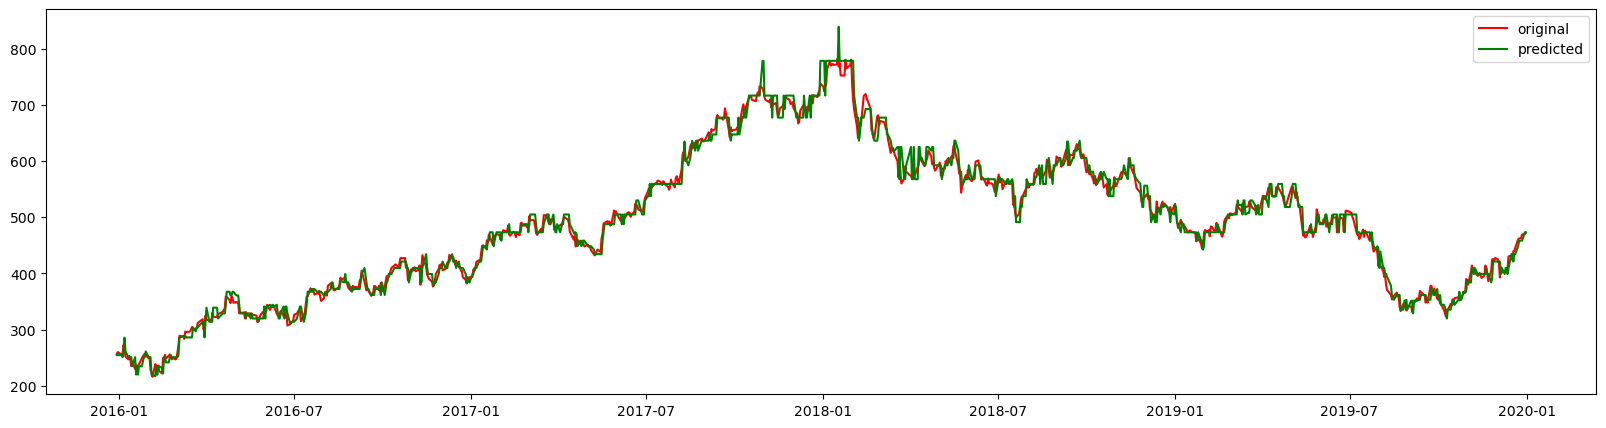

Sum of Predicted Profits:             3508.6927619852777
Sum of Actual Profit:                 302.7500000000003
Sum of Profits that can be achieved:  4061.8999999999996
Sum of absolute errors:               10040.035296673517
probability of predicting all ups:    0.508
probability of predicting all downs:  0.5010266940451745
accuracy:                             0.5045592705167173


In [31]:
df2 = data("TATASTEEl.csv")
df2 = generate_features(df2,40)
x_train,y_train,x_test,y_test,sc = process_data(df2)


from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 7,min_samples_leaf= 10)
regressor = regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)
y_test["Predicted"] = pred
graph(y_test)

info(results(y_test))

# KNN

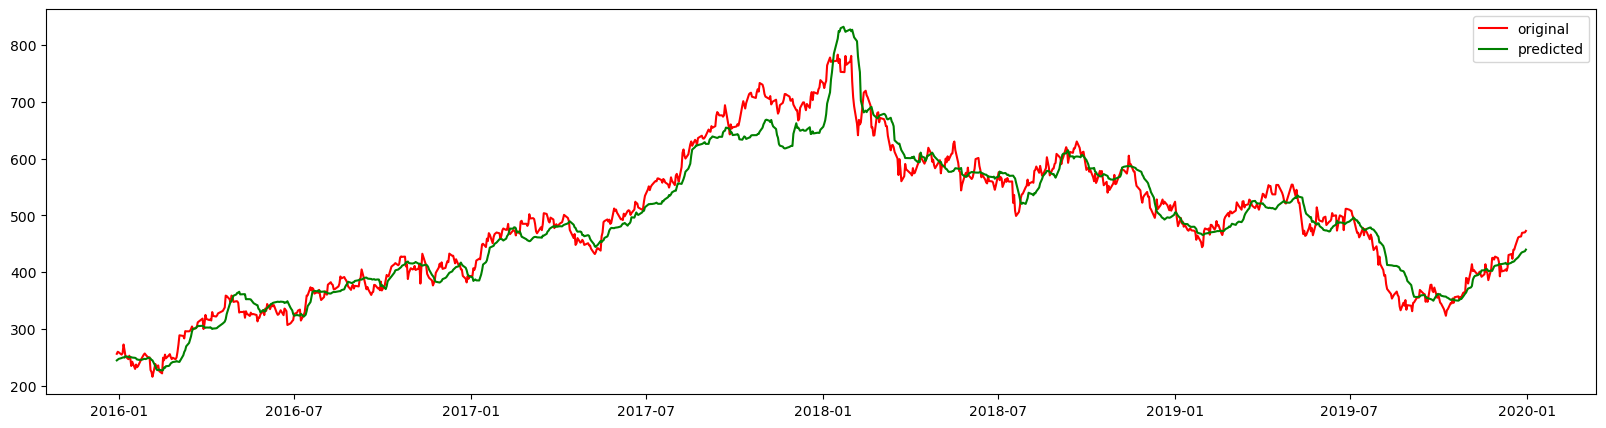

Sum of Predicted Profits:             7244.47
Sum of Actual Profit:                 269.00000000000006
Sum of Profits that can be achieved:  4061.8999999999996
Sum of absolute errors:               21027.673749999998
probability of predicting all ups:    0.446
probability of predicting all downs:  0.6016427104722792
accuracy:                             0.5227963525835866


In [34]:
df3 = data("TATASTEEl.csv")
df3 = generate_features(df3,40)
x_train,y_train,x_test,y_test,sc = process_data(df3)
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 40)
model.fit(x_train, y_train)
pred=model.predict(x_test)
y_test["Predicted"] = pred
graph(y_test)
info(results(y_test))

# MLPRegressor

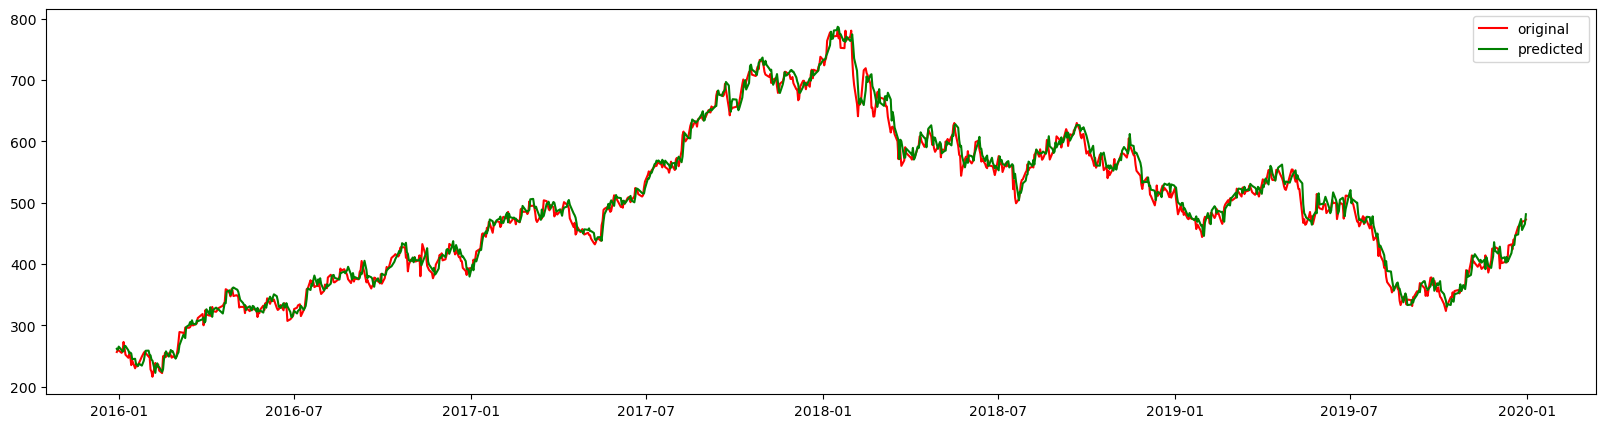

Sum of Predicted Profits:             4845.155540005277
Sum of Actual Profit:                 235.9000000000005
Sum of Profits that can be achieved:  4061.8999999999996
Sum of absolute errors:               9834.466278211323
probability of predicting all ups:    0.702
probability of predicting all downs:  0.3326488706365503
accuracy:                             0.5197568389057751


In [58]:
df4 = data("TATASTEEl.csv")
df4 = generate_features(df4,40)
x_train,y_train,x_test,y_test,sc = process_data(df4)
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(max_iter = 10000,hidden_layer_sizes = [10,10,10])
model.fit(x_train, y_train)
pred=model.predict(x_test)
y_test["Predicted"] = pred
y_test.head()
# y_test = movement(y_test)
graph(y_test)
info(results(y_test))

# Random Forest Regressor


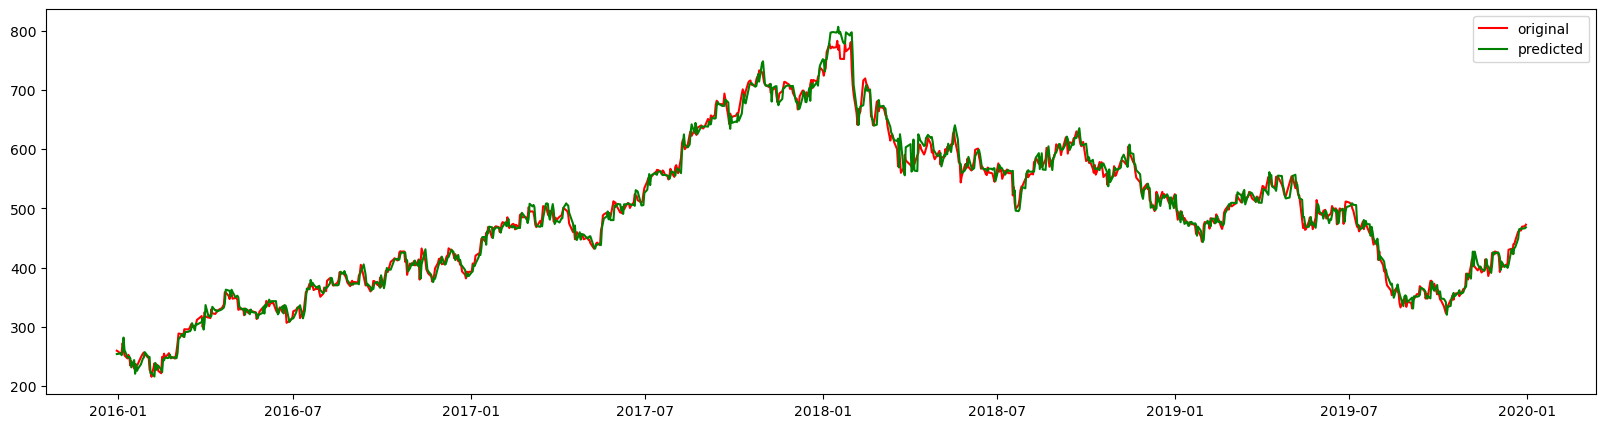

Sum of Predicted Profits:             2560.2274500001963
Sum of Actual Profit:                 230.20000000000047
Sum of Profits that can be achieved:  4058.2999999999997
Sum of absolute errors:               9278.119800000126
probability of predicting all ups:    0.533066132264529
probability of predicting all downs:  0.486652977412731
accuracy:                             0.5101419878296146


In [39]:
df5 = data("TATASTEEl.csv")
df5 = generate_features(df5,40)
x_train,y_train,x_test,y_test,sc = process_data(df5)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000)
model.fit(x_train, y_train)
pred=model.predict(x_test)
y_test["Predicted"] = pred
y_test.head()
y_test = movement(y_test)
graph(y_test)
info(results(y_test))

# SVM regressor


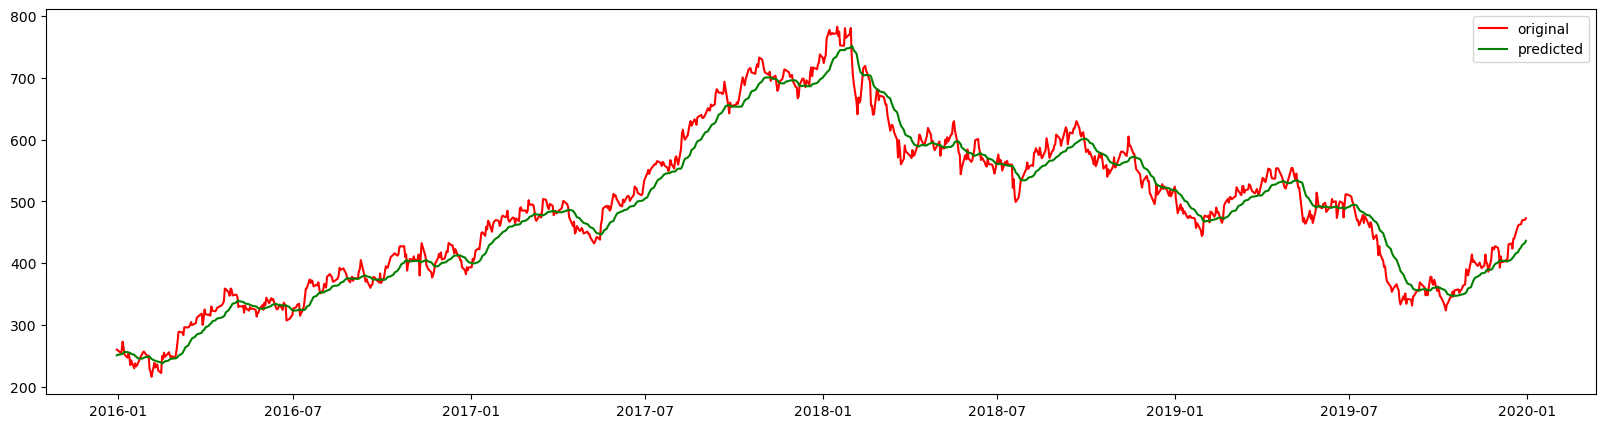

Sum of Predicted Profits:             5724.004363850251
Sum of Actual Profit:                 211.24999999999994
Sum of Profits that can be achieved:  4058.2999999999997
Sum of absolute errors:               18217.114905592913
probability of predicting all ups:    0.374749498997996
probability of predicting all downs:  0.6632443531827515
accuracy:                             0.5172413793103449


In [45]:
from sklearn.svm import SVR
df6 = data("TATASTEEl.csv")
df6 = generate_features(df6,40)
x_train,y_train,x_test,y_test,sc = process_data(df6)
model = SVR(kernel='poly',degree = 1)
model.fit(x_train, y_train)
pred=model.predict(x_test)
y_test["Predicted"] = pred
y_test.head()
y_test = movement(y_test)
graph(y_test)
info(results(y_test))